## <b>Testing the model on custom inputs</b>

In [1]:
from ultralytics import YOLO
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
model = YOLO("D:/Vehicle Damage Detection/detect/train3/weights/best.pt")

In [3]:
# image = "D:/Vehicle Damage Detection/WhatsApp Image 2024-09-12 at 7.21.51 PM.jpeg"
image = "D:/Vehicle Damage Detection/app/static/uploaded_image.jpg"
# image = "D:\Final Car Damage Detection\istockphoto-1303351800-1024x1024.jpg"

In [4]:
result = model(image)


image 1/1 D:\Vehicle Damage Detection\app\static\uploaded_image.jpg: 448x640 1 Bonnet, 1 Bumper, 1 Fender, 2 Lights, 324.0ms
Speed: 31.2ms preprocess, 324.0ms inference, 29.6ms postprocess per image at shape (1, 3, 448, 640)


In [5]:
result[0].names

{0: 'Bonnet',
 1: 'Bumper',
 2: 'Dickey',
 3: 'Door',
 4: 'Fender',
 5: 'Light',
 6: 'Windshield'}

In [6]:
detected_objects = result[0].boxes
num_objects = len(detected_objects)
class_ids = [box.cls.item() for box in detected_objects]
class_counts = Counter(class_ids)

class_names = list(result[0].names.values())

# Display the counts for each class
for class_id, count in class_counts.items():
    class_name = class_names[int(class_id)]  # Get the class name using the ID
    print(f"{class_name} Count: {count}")

Light Count: 2
Bumper Count: 1
Fender Count: 1
Bonnet Count: 1


In [7]:
result[0].show()

In [15]:
detected_img_path = result[0].save("D:/Vehicle Damage Detection/app/static/processed_image.jpg")

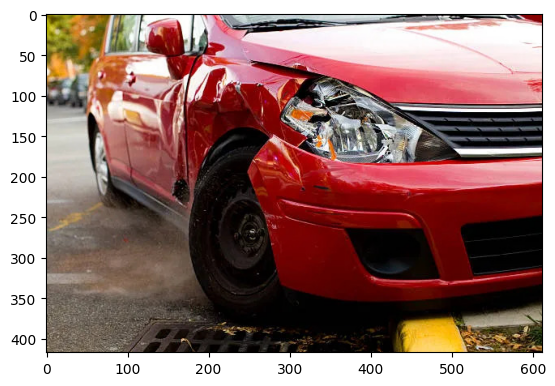

In [14]:
# Original image
plt.imshow(plt.imread(image))

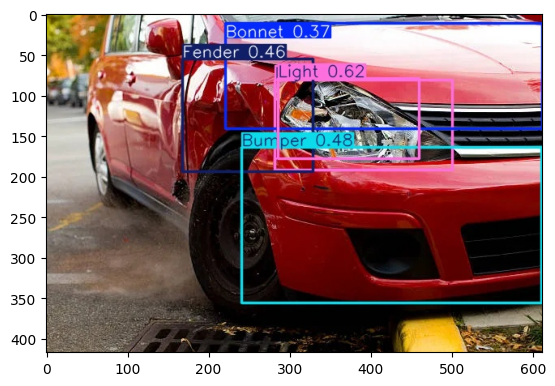

In [16]:
# Image with bounding boxes
plt.imshow(plt.imread(detected_img_path))

In [11]:
# Show the image with the detected objects
# image_ = result[0].plot()

# Save the image
# path_to_save = 'D:/Vehicle Damage Detection/detected_image.png'

# Use plt.imsave to save the NumPy array as an image
# plt.imsave(path_to_save, image_, format='png')

# Optionally, you can close the plot to free up memory
# plt.close()

In [13]:
# import matplotlib.pyplot as plt
# import cv2
# import numpy as np

# # Load the YOLO model
# model = YOLO("D:/Final Car Damage Detection/train3/weights/best.pt")

# # Load the image
# image = "D:/Final Car Damage Detection/istockphoto-1303351800-1024x1024.jpg"

# # Run the model on the image
# results = model(image)

# # Get the original image as BGR (assuming it's returned in BGR format)
# image_bgr = results[0].orig_img

# # Convert the BGR image to RGB (since matplotlib expects RGB format)
# image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# # Now, manually draw bounding boxes on the original image
# for box in results[0].boxes:
#     # Extract box coordinates
#     x1, y1, x2, y2 = map(int, box.xyxy[0])  # Accessing bounding box coordinates
    
#     label = int(box.cls.item())  # Convert the tensor to a Python integer
#     conf = box.conf.item()  # Convert the tensor to a Python float

#     # Draw bounding box (using green color for the box)
#     cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

#     # Add the label and confidence score
#     text = f"Class: {label} ({conf:.2f})"
#     cv2.putText(image_rgb, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# # Display the image with correct colors and bounding boxes
# plt.imshow(image_rgb)
# plt.axis('off')  # Optionally, hide the axes
# plt.show()